# Key Insights of Bikesharing in Boston 
## by Lilla Szulyovszky

## Investigation Overview

I took the chance to investigate a dataset from bikeshare.com on bike rentals in the year 2020 and in the area of Boston, US.

The burning questions in my mind were mainly around when are the most trips taken in terms of 
- time of the days 
- days of the week
- months of the year 

and how does these depend on if a user is a single ride customer or one with a subscription?


## Dataset Overview

I had 12 cv's (the twelve months of the year 2020) which I needed to merge and conjure a few additional columns to so I can draw beautiful plots and conclusions from it.

The default columns were the following:

**Columns**
- **tripduration**: trip duration in seconds
- **starttime**: the time the rental started
- **stoptime**: the time teh rental ended
- **start station id**: where the rental started
- **end station id**: where the rental ended
- **start station latitude**: gps coordinates of start station
- **start station longitude**: gps coordinates of start station
- **end station latitude**: gps coordinates of end station
- **end station longitude**: gps coordinates of end station
- **bikeid**: identificator of the bike used
- **usertype**: if the user has subscription or not

 Added:
- **type**: weekday or weekend
- **month**: month of the year
- **timeoftheday**: time by hour
- **weekday**: day of the week

In [5]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pandas
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [7]:
# load in the dataset into a pandas dataframe
df_all = pandas.read_csv('bikesharing_full_year.csv')
df_all.head()

tripduration                starttime                 stoptime  \
0           478  2020-01-01 00:04:05.809  2020-01-01 00:12:04.237   
1           363  2020-01-01 00:04:45.699  2020-01-01 00:10:49.040   
2           284  2020-01-01 00:06:07.063  2020-01-01 00:10:51.924   
3           193  2020-01-01 00:06:13.855  2020-01-01 00:09:27.832   
4           428  2020-01-01 00:07:25.295  2020-01-01 00:14:33.780   

   start station id                           start station name  \
0               366                              Broadway T Stop   
1               219                  Boston East - 126 Border St   
2               219                  Boston East - 126 Border St   
3               396                         Main St at Beacon St   
4                60  Charles Circle - Charles St at Cambridge St   

   start station latitude  start station longitude  end station id  \
0               42.342781               -71.057473              93   
1               42.373312               -71.041020             212   
2               42.373312               -71.041020             212   
3               42.409330               -71.063819             387   
4               42.360793               -71.071190              49   

               end station name  end station latitude  end station longitude  \
0              JFK/UMass T Stop             42.320340             -71.051180   
1  Maverick Square - Lewis Mall             42.368844             -71.039778   
2  Maverick Square - Lewis Mall             42.368844             -71.039778   
3        Norman St at Kelvin St             42.409859             -71.066319   
4       Stuart St at Charles St             42.351146             -71.066289   

   bikeid    usertype  weekday    month  timeoftheday     type  
0    6005    Customer        2  January             0  Weekday  
1    3168  Subscriber        2  January             0  Weekday  
2    3985  Subscriber        2  January             0  Weekday  
3    2692  Subscriber        2  January             0  Weekday  
4    4978  Subscriber        2  January             0  Weekday

## Trip duration by the Months of the Year based on User types

This plot clearly shows that
1, single ride customers are using the bikes for a longer duration than subscribers
2, single ride customers are using the bikes more often than subscribers
3, both user types are using the bikes more often and for a longer time in the months of summer.

Next I'll explore how does the frequency look like by hours.

Text(0, 0.5, 'Trip duration')

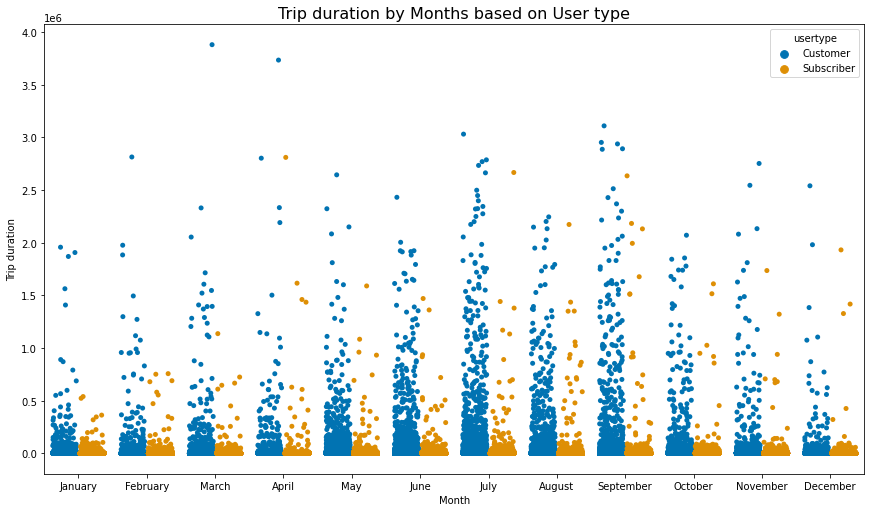

In [8]:
# plot the trip duration by the months of the year based on if the user is a customer or a subscriber
plt.figure(figsize=[14.70, 8.27])
sb.stripplot(data = df_all, x = 'month', y = 'tripduration', hue = 'usertype',
            jitter = 0.35, dodge = True, palette = 'colorblind')
plt.title('Trip duration by Months based on User type', fontsize = 16)
plt.xlabel('Month')
plt.ylabel('Trip duration')

## Number of trips by the hours of the day on weekends and on weekdays 


This is probably one of the most insightful plots in this analysis.

On weekdays, we can see the frequency of usage goes up around rush hours, which makes a lot of sense.
On the other hand, weekends show a very balanced and gradually increasing and decreasing usage as people start to wake up, maybe go for a longer ride during the day and go home around the end of the afternoon.

(0.0, 100000.0)

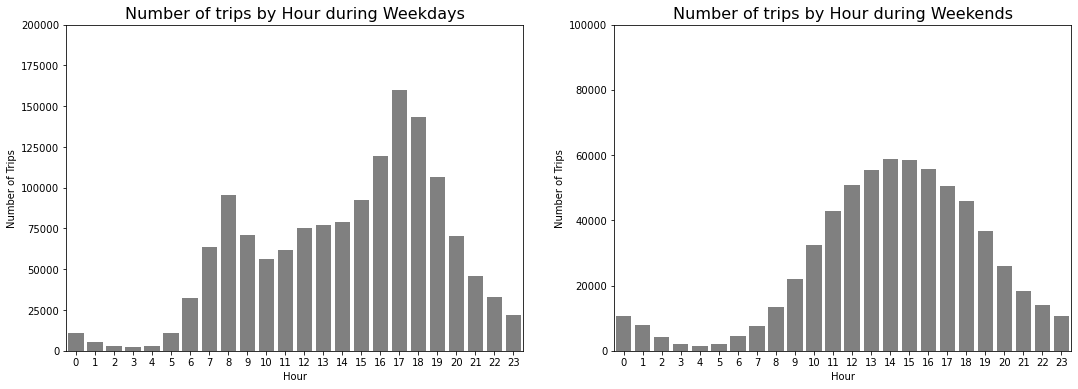

In [9]:
# plot the number of trips by the hours of the day on weekdays and weekends
plt.figure(figsize=[18, 6])
plt.subplot(1,2,1)
fig1 = sb.countplot(data = df_all[df_all['type']== 'Weekday'], x = 'timeoftheday', color = 'Grey')
plt.title('Number of trips by Hour during Weekdays', fontsize = 16)
plt.xlabel('Hour')
plt.ylabel('Number of Trips')
plt.ylim([0,200000])
plt.subplot(1,2,2)
fig1 = sb.countplot(data = df_all[df_all['type']== 'Weekend'], x = 'timeoftheday', color = 'Grey')
plt.title('Number of trips by Hour during Weekends', fontsize = 16)
plt.xlabel('Hour')
plt.ylabel('Number of Trips')
plt.ylim([0,100000])

## Trip duration by the type of the weekday based on User type

By the plot above we can conclude that 
1, Customers use the bikes for longer trips than Subscribers on both type of weekdays, but more on the weekends
2, Subscribers also use the bikes for longer trips on weekends, but considerebly shorter rides than single ride customers


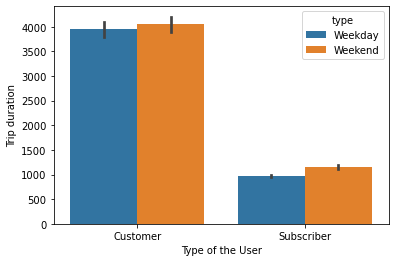

In [10]:
# plot the trip duration by the type of the weekday based on user type
ax = sb.barplot(data=df_all, x = 'usertype', y='tripduration', hue='type')
plt.ylabel('Trip duration')
plt.xlabel('Type of the User');

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!

In [13]:
jupyter nbconvert Slide_Deck_LS.ipynb --to slides --post serve --template output_toggle

SyntaxError: invalid syntax (<ipython-input-13-ead14e1017e5>, line 1)